In [1]:
from pysdmx.io import get_datasets
import utils
import json

with open('sub_codelists.json', 'r') as f:
    sub_codelists = json.load(f)
    


Selecting basic datasets:

In [45]:
nrg_bal_siec_basic_constraints = {
    'freq': 'A',
    'nrg_bal': sub_codelists['nrg_bal_total_consumption'],
    'siec': ['C0000X0350-0370', 'C0350-0370', 'P1000', 'S2000', 'G3000', 'O4000XBIO', 'RA000', 'W6100_6220', 'N900H', 'E7000', 'H8000'],
    'unit': 'GWH',
    'geo': 'EU27_2020',
}

data_selection = utils.build_data_selection(nrg_bal_siec_basic_constraints)

data_url = utils.get_data_url('nrg_bal_s', data_selection=data_selection, start_period=2000)
metadata_url = utils.get_metadata_url('nrg_bal_s')

nrg_bal_siec_basic = utils.get_datasets(data_url, metadata_url, validate=False)[0]
nrg_bal_siec_basic.data.TIME_PERIOD = nrg_bal_siec_basic.data.TIME_PERIOD.astype(int)
nrg_bal_siec_basic.data.OBS_VALUE = nrg_bal_siec_basic.data.OBS_VALUE.astype(float)
display(nrg_bal_siec_basic.data)

Invalid: Validation Error: Cannot parse input as SDMX-ML.

In [33]:
demo_pjan_constraints={
    'freq': 'A',
    'unit': 'NR',
    'age': 'TOTAL',
    'sex': 'T',
    'geo': 'EU27_2020',

    }

data_selection = utils.build_data_selection(demo_pjan_constraints)

data_url = utils.get_data_url('demo_pjan', data_selection=data_selection, start_period=2001)
metadata_url = utils.get_metadata_url('demo_pjan')
demo_pjan_total = utils.get_datasets(data_url, metadata_url, validate=False)[0]
demo_pjan_total.data.OBS_VALUE = demo_pjan_total.data.OBS_VALUE.astype(float)

# We have to subtract 1 year to the TIME_PERIOD to match the nrg_bal_s_total data
demo_pjan_total.data.TIME_PERIOD = demo_pjan_total.data.TIME_PERIOD.astype(int)
demo_pjan_total.data.TIME_PERIOD  = demo_pjan_total.data.TIME_PERIOD  - 1
display(demo_pjan_total.data)


,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,2000,429240746.0,b
1,2001,429723142.0,nan
2,2002,431190184.0,nan
3,2003,432762039.0,nan
4,2004,434416272.0,nan
5,2005,435816236.0,nan
6,2006,437227496.0,nan
7,2007,438725386.0,b
8,2008,440047892.0,nan
9,2009,440660421.0,b


<Axes: xlabel='TIME_PERIOD'>

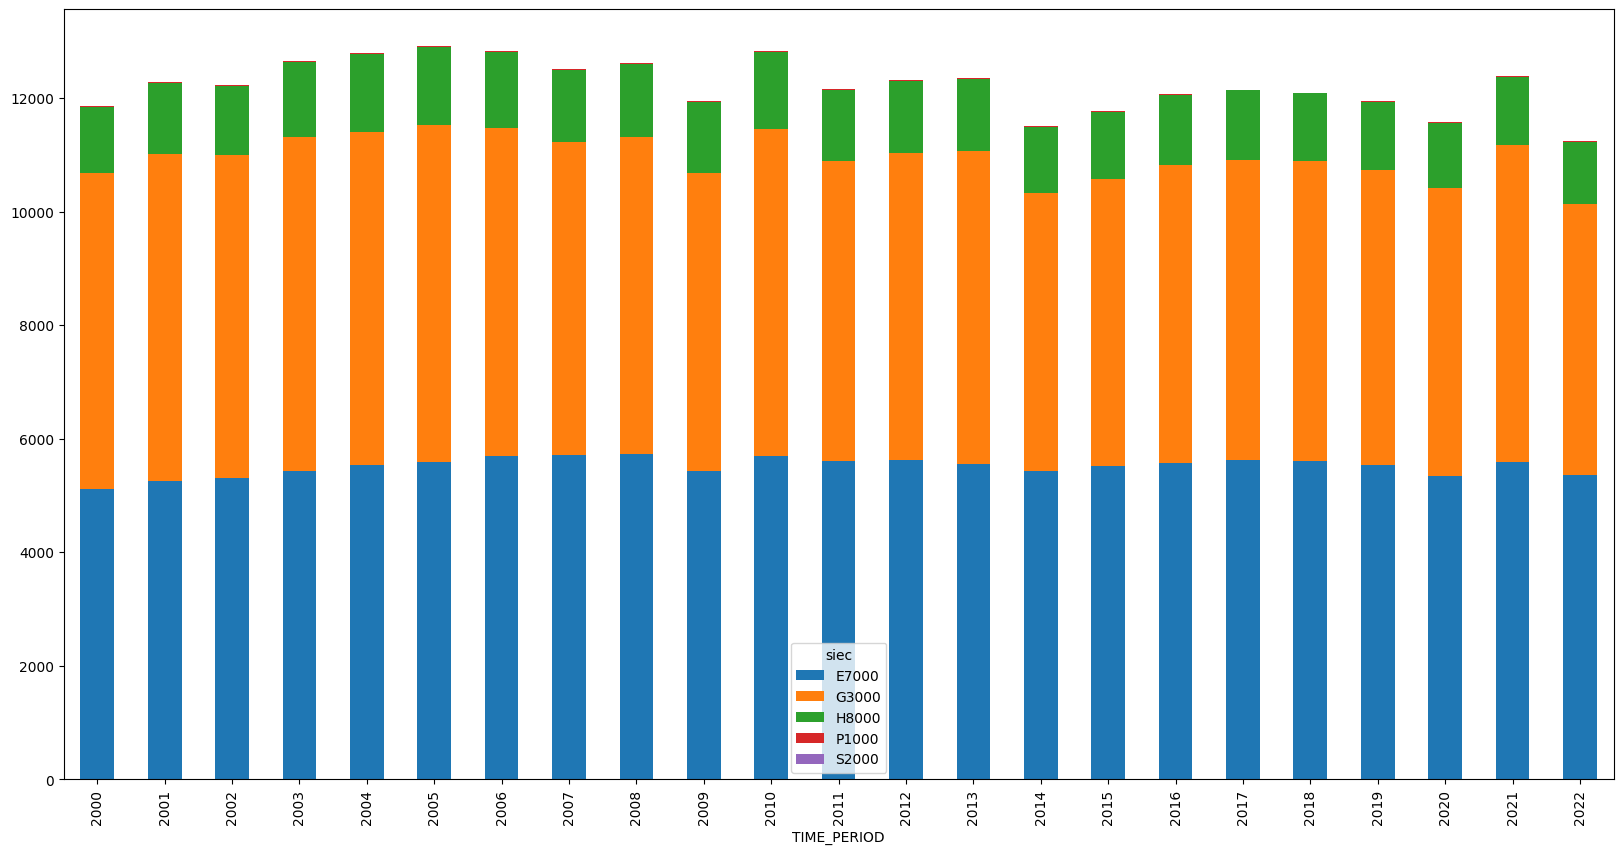

In [44]:
#kWh per capita
full_dataset = nrg_bal_siec_basic.data.merge(demo_pjan_total.data, on='TIME_PERIOD')
full_dataset.rename(columns={'OBS_VALUE_x': 'energy_consumption_gwh', 'OBS_VALUE_y': 'population'}, inplace=True)
full_dataset['energy_consumption_PC_kwh'] = full_dataset['energy_consumption_gwh'] / full_dataset['population'] * 1000000
# nrg_bal_s_total_pc = nrg_bal_siec_basic.data.OBS_VALUE / demo_pjan_total.data.OBS_VALUE * 1000000
full_dataset.groupby(['TIME_PERIOD', 'siec']).sum().unstack().plot(y='energy_consumption_PC_kwh', kind='bar', stacked=True, figsize=(20, 10))